# Assignment 2: Neural Networks and Optimization (33 marks total)
### Due: October 3 at 11:59pm

### Name: Ben Yuen

### In this assignment, you will need to write code that uses a linear model and a neural network to perform a regression task. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Linear Regression vs. Neural Network

For this assignment, we will be using the concrete example from yellowbrick. We will be evaluating how well neural networks perform compared to linear regression.

### Step 0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### Step 1: Data Input (2 marks)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

*Note: the yellowbrick library is not included in the default Anaconda installation, so you will need to install it*

In [3]:
# TO DO: Import concrete dataset from yellowbrick library (0.5 marks)
data_directory = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
column_names = [
    'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 
    'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 
    'Age', 'Concrete compressive strength'
]
try: 
    dataset = pd.read_excel(data_directory, names=column_names)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading from URL: {e}")
# TO DO: Print size and type of X and y (0.5 marks)
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

print("=== X (Features) ===")
print(f"Type: {type(X)}")
print(f"Size: {X.shape}")
print(f"Data type: {X.dtypes}")

print("\n=== y (Target) ===")
print(f"Type: {type(y)}")
print(f"Size: {y.shape}")
print(f"Data type: {y.dtype}")

Dataset loaded successfully!
=== X (Features) ===
Type: <class 'pandas.core.frame.DataFrame'>
Size: (1030, 8)
Data type: Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
dtype: object

=== y (Target) ===
Type: <class 'pandas.core.series.Series'>
Size: (1030,)
Data type: float64


In [4]:
# TO DO: Inspect the first few columns of the imported feature matrix (0.5 marks)
print("Feature matrix X (first 5 rows):")
print(X.head())
print("\n")
print("Target vector y (first 5 values):")
print(y.head())

Feature matrix X (first 5 rows):
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  
0            1040.0           676.0   28  
1            1055.0           676.0   28  
2             932.0           594.0  270  
3             932.0           594.0  365  
4             978.4           825.5  360  


Target vector y (first 5 values):
0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength, dtype: float64


In [5]:
# TO DO: Use .describe() to inspect the mean and variance of each feature (0.5 marks)
print(X.describe())

            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  
count       1030.000000       1030.000000     1030.000000  1030.000000  
mean           6.203112        972.918592      773.578883    45.662136  
std            5.973492         77.753818       80.175427    63.169912  
min            0.000000        801.000000      594.000000     1.000000  
25%            0.00000

### Step 2: Data Processing (2 marks)

Check if there are any missing values and fill them in if necessary. Remove any non-numeric columns.

In [6]:
# TO DO: Process the data - fill-in any missing values and remove any non-numeric columns (0.5 marks)
print("Missing values in features (X):")
print(X.isnull().sum())

print("\nMissing values in target (y):")
print(y.isnull().sum())

# Check data types to identify non-numeric columns
print("\nData types in features (X):")
print(X.dtypes)

print("\n")
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Missing values in features (X):
Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
dtype: int64

Missing values in target (y):
0

Data types in features (X):
Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
dtype: object


Index([], dtype='object')


You can add the target vector and the feature matrix together and inspect the relationship between the features and target using a `pairplot()`

In [7]:
# TO DO: Add the target vector and the feature matrix together (0.5 marks)
combined_data = X.copy()
combined_data['Concrete compressive strength'] = y

print("Combined data shape:", combined_data.shape)
print("\nCombined data columns:")
print(combined_data.columns.tolist())


Combined data shape: (1030, 9)

Combined data columns:
['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength']


<Figure size 640x480 with 0 Axes>

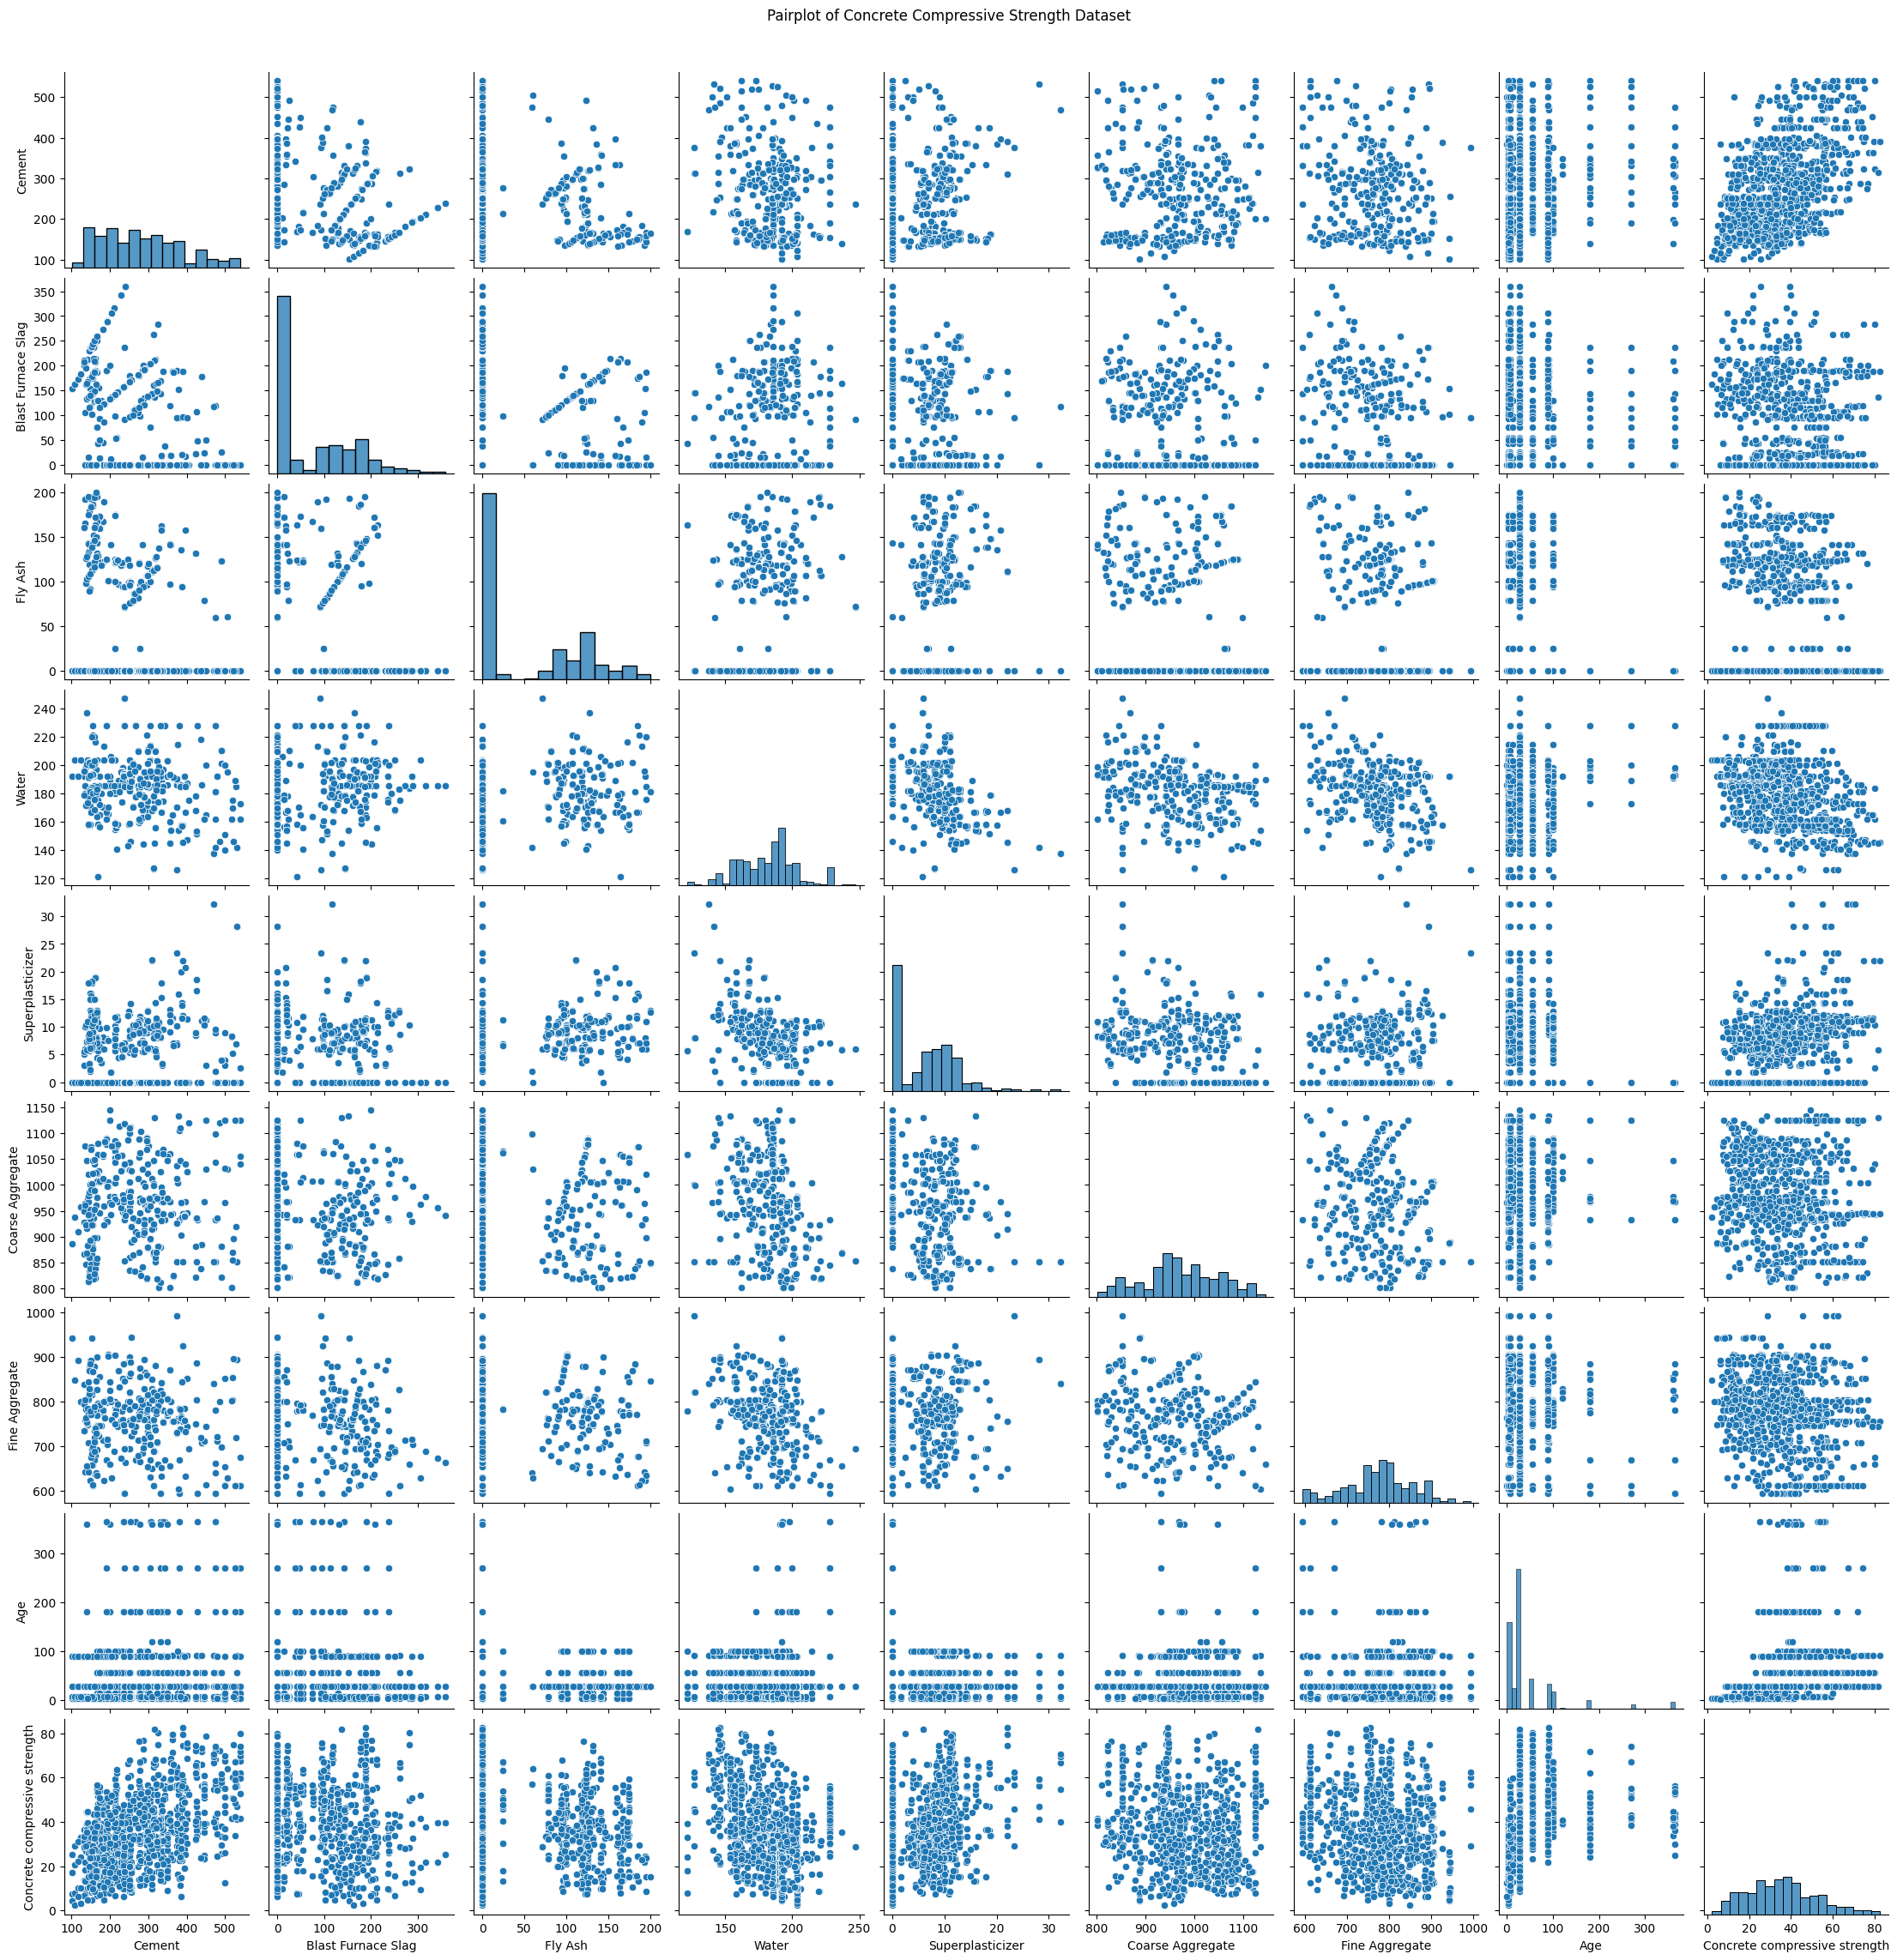

In [8]:
# TO DO: Use pairplot() (0.5 marks)
plt.figure()
sns.pairplot(combined_data)
plt.suptitle('Pairplot of Concrete Compressive Strength Dataset', y=1.02)
plt.show()

In [9]:
# Check if you're properly scaling your features
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Also check target distribution
print("Target statistics:")
print(f"Mean: {y.mean()}")
print(f"Std: {y.std()}")
print(f"Min: {y.min()}")
print(f"Max: {y.max()}")

Target statistics:
Mean: 35.8178358261136
Std: 16.705679174867946
Min: 2.331807832
Max: 82.5992248


The concrete data is already be split into the feature matrix and target vector. The next step is to split the data into training and testing subsets. For this assignment, you can use `train_test_split()` with `random_state=0`

In [10]:
# TO DO: Split the data into training and testing data (0.5 marks)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Data splitting completed:")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

# Show the split ratio
total_samples = len(X)
train_samples = len(X_train)
test_samples = len(X_test)

print(f"\nSplit ratio: {train_samples}/{total_samples} = {train_samples/total_samples:.1%} training, "
      f"{test_samples}/{total_samples} = {test_samples/total_samples:.1%} testing")

Data splitting completed:
Training features shape: (824, 8)
Testing features shape: (206, 8)
Training target shape: (824,)
Testing target shape: (206,)

Split ratio: 824/1030 = 80.0% training, 206/1030 = 20.0% testing


Looking at the mean and variance of the dataset, it is clear that the features have a wide range of values. You can use the code below to scale the feature matrix

*Note: `StandardScaler()` scales the data to a mean of 0 and a variance of 1*

In [11]:
from sklearn.preprocessing import StandardScaler

# Scale the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform it
X_test_scaled = scaler.transform(X_test)        # Transform test data using training fit

print("Data scaling completed:")
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled testing features shape: {X_test_scaled.shape}")

# Verify the scaling worked
print("\nBefore scaling - Training data statistics:")
print(f"Mean: {X_train.mean().values}")
print(f"Std:  {X_train.std().values}")

print("\nAfter scaling - Training data statistics:")
print(f"Mean: {X_train_scaled.mean(axis=0)}")  # Should be close to 0
print(f"Std:  {X_train_scaled.std(axis=0)}")   # Should be close to 1

print("\nAfter scaling - Testing data statistics:")
print(f"Mean: {X_test_scaled.mean(axis=0)}")   # May not be exactly 0
print(f"Std:  {X_test_scaled.std(axis=0)}")    # May not be exactly 1



Data scaling completed:
Scaled training features shape: (824, 8)
Scaled testing features shape: (206, 8)

Before scaling - Training data statistics:
Mean: [279.32770631  77.74300971  54.55069175 181.39490291   6.32059587
 971.76919903 773.17425971  45.79368932]
Std:  [104.65175127  88.29151478  64.50687564  21.41823628   5.96846014
  77.77693311  81.12713801  61.81753937]

After scaling - Training data statistics:
Mean: [-3.23365930e-17 -1.11022302e-16 -4.31154573e-18  5.21697033e-16
 -1.54137760e-16 -1.08435375e-15  1.61682965e-16 -6.68289588e-17]
Std:  [1. 1. 1. 1. 1. 1. 1. 1.]

After scaling - Testing data statistics:
Mean: [ 0.0878648  -0.21801988 -0.02819673  0.04005009 -0.09848066  0.07393524
  0.02495278 -0.01064692]
Std:  [0.99056898 0.858955   0.96007738 0.98524506 1.00094559 0.99693013
 0.94024768 1.10559462]


### Step 3: Implement Machine Learning Model (2 marks)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`
3. Implement the machine learning model with the scaled data

In [12]:
# TO DO: ADD YOUR CODE HERE
# 1. Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# 2. Instantiate model LinearRegression()
linear_model = LinearRegression()

# 3. Implement the machine learning model with the scaled data
linear_model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")
print(f"Model coefficients: {linear_model.coef_}")
print(f"Model intercept: {linear_model.intercept_:.4f}")

# Display coefficient details for better understanding
print("\n=== Model Coefficients ===")
feature_names = X.columns
for feature, coef in zip(feature_names, linear_model.coef_):
    print(f"{feature:20}: {coef:8.4f}")

Linear Regression model trained successfully!
Model coefficients: [12.46856628  9.59955452  5.87680709 -3.11872465  1.87233663  1.7249947
  1.81960492  7.11755902]
Model intercept: 36.1007

=== Model Coefficients ===
Cement              :  12.4686
Blast Furnace Slag  :   9.5996
Fly Ash             :   5.8768
Water               :  -3.1187
Superplasticizer    :   1.8723
Coarse Aggregate    :   1.7250
Fine Aggregate      :   1.8196
Age                 :   7.1176


### Step 4: Validate Model (3 marks)

Calculate the training and validation accuracy using mean squared error.

In [13]:
# TO DO: ADD YOUR CODE HERE (2 marks)

from sklearn.metrics import mean_squared_error

# Make predictions on training and testing data
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Calculate Mean Squared Error for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE) for better interpretation
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate R-squared scores
train_r2 = linear_model.score(X_train_scaled, y_train)
test_r2 = linear_model.score(X_test_scaled, y_test)

In [14]:
# TO DO: Print the results (1 mark)
print("=== Model Validation Results ===")
print(f"Training MSE:   {train_mse:.4f}")
print(f"Testing MSE:    {test_mse:.4f}")

print(f"\nTraining RMSE:  {train_rmse:.4f}")
print(f"Testing RMSE:   {test_rmse:.4f}")

print(f"\nTraining R²:    {train_r2:.4%}")
print(f"Testing R²:     {test_r2:.4%}")

# Compare training vs testing performance
print(f"\n=== Performance Comparison ===")
print(f"R² Difference:  {test_r2 - train_r2:.4%}")

=== Model Validation Results ===
Training MSE:   110.3455
Testing MSE:    95.6353

Training RMSE:  10.5045
Testing RMSE:   9.7793

Training R²:    60.9071%
Testing R²:     63.6898%

=== Performance Comparison ===
R² Difference:  2.7827%


## Part B: Neural Network

Now we will repeat the above analysis using a neural network. For this assignment, we will be using the PyTorch library.

In [15]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

### Step 2: Data Processing (2 marks)

To make this analysis easier, we can convert the data into tensors.

In [16]:
# TO DO: Convert training and testing data to tensors (1 mark)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [17]:
# TO DO: Print the size of the training features and labels (1 mark)
print("=== PyTorch Tensor Sizes ===")
print(f"Training features shape: {X_train_tensor.shape}")
print(f"Training labels shape:   {y_train_tensor.shape}")
print(f"Testing features shape:  {X_test_tensor.shape}")
print(f"Testing labels shape:    {y_test_tensor.shape}")

print(f"\nData types:")
print(f"X_train_tensor: {X_train_tensor.dtype}")
print(f"y_train_tensor: {y_train_tensor.dtype}")

print(f"\nSample of training features (first row):")
print(X_train_tensor[0])

print(f"\nSample of training labels (first 5):")
print(y_train_tensor[:5])

=== PyTorch Tensor Sizes ===
Training features shape: torch.Size([824, 8])
Training labels shape:   torch.Size([824])
Testing features shape:  torch.Size([206, 8])
Testing labels shape:    torch.Size([206])

Data types:
X_train_tensor: torch.float32
y_train_tensor: torch.float32

Sample of training features (first row):
tensor([ 1.9187, -0.8811, -0.8462,  0.4954, -1.0596, -0.4602, -0.6435, -0.2880])

Sample of training labels (first 5):
tensor([43.8920, 38.2108, 33.4196, 13.1207, 47.2222])


The labels must be changed from a vector to a 2-D array to make sure that the math works properly. Use the provided code below to fix this issue:

In [18]:
y_train = y_train_tensor.unsqueeze(1)
y_test = y_test_tensor.unsqueeze(1)
print(y_train.size())

torch.Size([824, 1])


### Step 3: Implement Neural Network (10 marks)

For this assignment, we will use the SGD optimizer with the following parameters:
- Initial learning rate = 0.001
- Momentum = 0.9

We will use the same learning rate schedule that was used in the Backpropagation Example on D2L.

For the optimization process, we will need to both train and test the data for each epoch. It is up to you how you want to organize your code for this process. You will need to include the following steps:
- Load your data using the `DataLoader()`
- Define a model with two hidden layers with 50 hidden units each
- Choose your loss function
- initialize your optimizer
- Set up your training and testing loops for 100 epochs
    - Remember that you must go through the training and testing code for each epoch sequentially
- Print out the average training and testing loss for each epoch (or plot in graph)

Step 1: Preprocessing data...
Training set size: (824, 8)
Test set size: (206, 8)

Step 2: Building neural network with EXACT SGD specifications...
Model Specifications:
- Two hidden layers with 50 units each
- SGD optimizer with Momentum = 0.9
- Initial learning rate = 0.001
- Learning rate schedule: η = η₀ / t^0.5
- MSE loss function
- 100 epochs
- Batch size: 32

Step 3: Training for 100 epochs with loss and R² tracking...
Epoch 10/100 - Train Loss: 49.4402, Test Loss: 56.9563
                Train R²: 0.8248, Test R²: 0.7838, LR: 0.000316
Epoch 20/100 - Train Loss: 38.3529, Test Loss: 51.1150
                Train R²: 0.8641, Test R²: 0.8059, LR: 0.000224
Epoch 30/100 - Train Loss: 31.7714, Test Loss: 45.2216
                Train R²: 0.8874, Test R²: 0.8283, LR: 0.000183
Epoch 40/100 - Train Loss: 28.9861, Test Loss: 41.8912
                Train R²: 0.8973, Test R²: 0.8410, LR: 0.000158
Epoch 50/100 - Train Loss: 27.4764, Test Loss: 41.5453
                Train R²: 0.9027, Test 

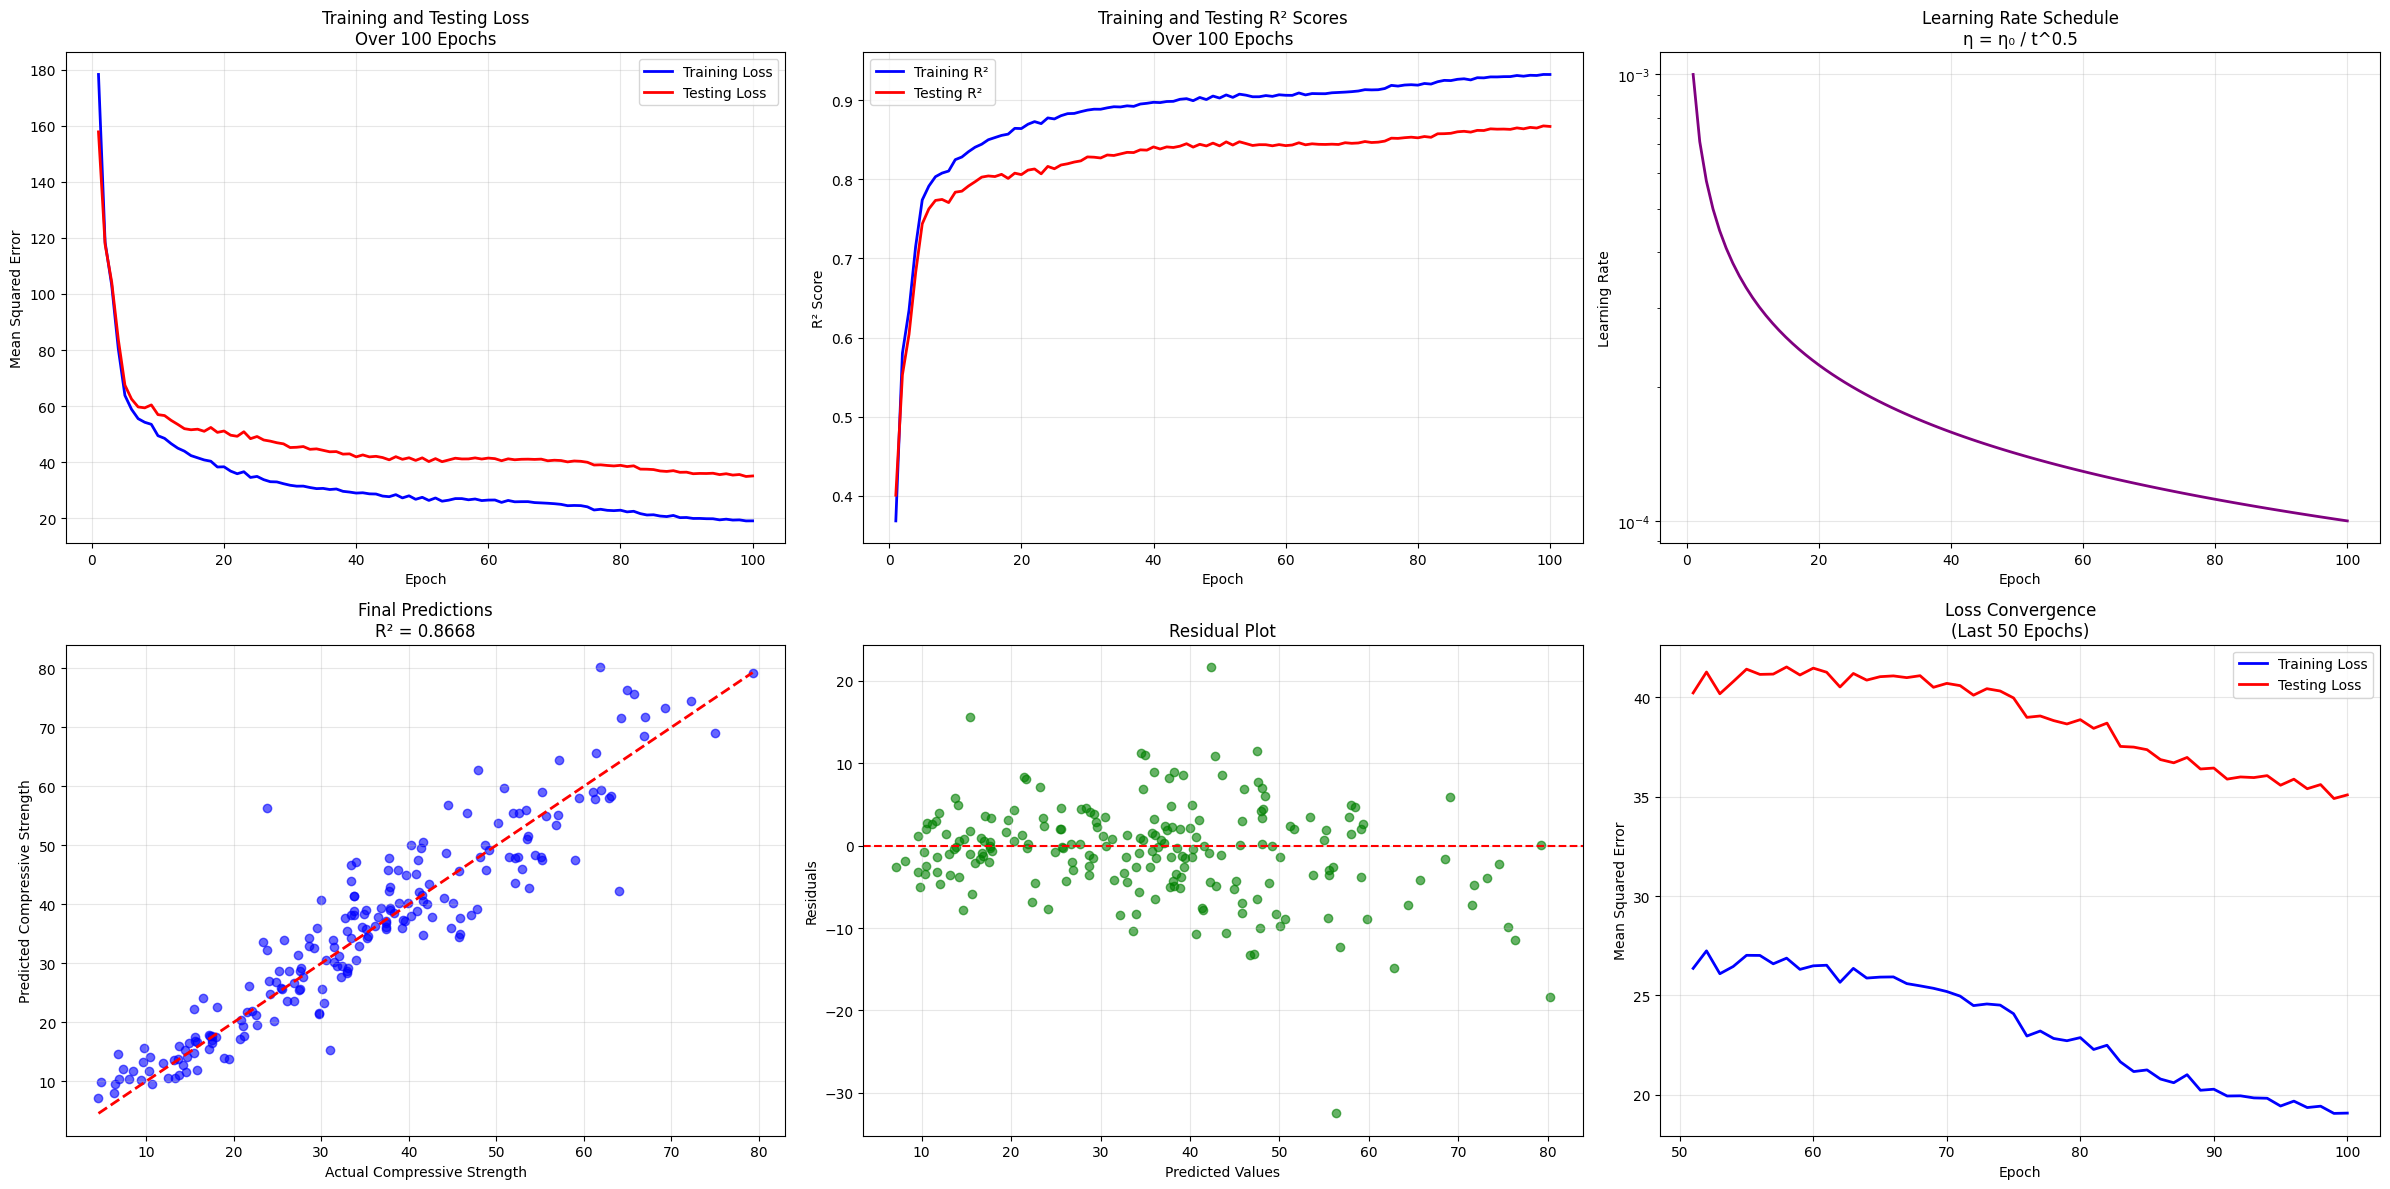


Example Predictions (First 10 test samples):
Actual  -> Predicted
-------------------------
  26.1 ->   23.6
  10.4 ->   11.7
  79.3 ->   79.3
  75.0 ->   69.1
   9.7 ->   13.2
  47.1 ->   38.2
  59.0 ->   47.5
  22.7 ->   19.6
  61.9 ->   80.2
  52.1 ->   47.9

Detailed Training Statistics:
Initial Training Loss: 178.2572
Final Training Loss: 19.0761
Training Loss Improvement: 89.3%
Initial Testing Loss: 157.7836
Final Testing Loss: 35.0866
Testing Loss Improvement: 77.8%

R² Score Statistics:
Initial Training R²: 0.3685
Final Training R²: 0.9324
Training R² Improvement: 153.0%
Initial Testing R²: 0.4009
Final Testing R²: 0.8668
Testing R² Improvement: 116.2%

Learning Rate Statistics:
Initial Learning Rate: 0.001000
Final Learning Rate: 0.000100
Learning Rate Decay: 90.0%

SGD Configuration Confirmation:
✓ Momentum: 0.9
✓ Initial Learning Rate: 0.001
✓ Learning Rate Schedule: invscaling
✓ Power_t: 0.5
✓ Nesterov Momentum: True

FINAL MODEL PERFORMANCE SUMMARY
Best Training R²: 0.932

In [19]:
# Neural Network with Exact SGD Specifications and Learning Rate Schedule
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

print("Step 1: Preprocessing data...")
# Scale the features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=0
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

print("\nStep 2: Building neural network with EXACT SGD specifications...")
# Create MLP Regressor with EXACT specifications
mlp_model = MLPRegressor(
    hidden_layer_sizes=(50, 50),  # TWO hidden layers with 50 units each
    activation='relu',
    solver='sgd',                 # Stochastic Gradient Descent (SGD)
    alpha=0.001,                  # L2 regularization
    batch_size=32,                # Mini-batch SGD
    learning_rate='invscaling',   # Learning rate schedule: η = η0 / t^power
    learning_rate_init=0.001,     # Initial learning rate = 0.001
    power_t=0.5,                  # Power for inverse scaling (common schedule)
    momentum=0.9,                 # Momentum = 0.9 (KEY CHANGE)
    nesterovs_momentum=True,      # Use Nesterov momentum
    max_iter=1,                   # 1 epoch at a time
    early_stopping=False,
    validation_fraction=0.0,
    n_iter_no_change=1000,
    random_state=0,
    warm_start=True
)

print("Model Specifications:")
print("- Two hidden layers with 50 units each")
print("- SGD optimizer with Momentum = 0.9")
print("- Initial learning rate = 0.001")
print("- Learning rate schedule: η = η₀ / t^0.5")
print("- MSE loss function")
print("- 100 epochs")
print("- Batch size: 32")

# Custom training loop to track losses, R² scores, and learning rates per epoch
print("\nStep 3: Training for 100 epochs with loss and R² tracking...")
train_losses = []
test_losses = []
train_r2_scores = []
test_r2_scores = []
learning_rates = []

for epoch in range(100):
    # Train for one epoch
    mlp_model.fit(X_train, y_train)
    
    # Get predictions for training and testing
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    # Calculate losses
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store metrics
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    
    # Calculate current learning rate using inverse scaling: η = η0 / (1 + t * power_t)
    current_lr = mlp_model.learning_rate_init / ((epoch + 1) ** mlp_model.power_t)
    learning_rates.append(current_lr)
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/100 - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
        print(f"                Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}, LR: {current_lr:.6f}")

print("\nStep 4: Final evaluation...")
y_pred = mlp_model.predict(X_test)


# Calculate final metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFinal Neural Network Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Final training loss: {train_losses[-1]:.4f}")
print(f"Final testing loss: {test_losses[-1]:.4f}")
print(f"Final training R²: {train_r2_scores[-1]:.4f}")
print(f"Final testing R²: {test_r2_scores[-1]:.4f}")
print(f"Final learning rate: {learning_rates[-1]:.6f}")

print("\nStep 5: Creating comprehensive visualizations...")
plt.figure(figsize=(24, 12))

# Plot 1: Training and Testing Loss over Epochs
plt.subplot(2, 3, 1)
plt.plot(range(1, 101), train_losses, label='Training Loss', color='blue', linewidth=2)
plt.plot(range(1, 101), test_losses, label='Testing Loss', color='red', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Loss\nOver 100 Epochs')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: R² Scores over Epochs
plt.subplot(2, 3, 2)
plt.plot(range(1, 101), train_r2_scores, label='Training R²', color='blue', linewidth=2)
plt.plot(range(1, 101), test_r2_scores, label='Testing R²', color='red', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.title('Training and Testing R² Scores\nOver 100 Epochs')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Learning Rate Schedule
plt.subplot(2, 3, 3)
plt.plot(range(1, 101), learning_rates, color='purple', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule\nη = η₀ / t^0.5')
plt.yscale('log')  # Log scale to better see the decay
plt.grid(True, alpha=0.3)

# Plot 4: Predictions vs Actual
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Compressive Strength')
plt.ylabel('Predicted Compressive Strength')
plt.title(f'Final Predictions\nR² = {r2:.4f}')
plt.grid(True, alpha=0.3)

# Plot 5: Residuals
plt.subplot(2, 3, 5)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Plot 6: Loss convergence (last 50 epochs for detail)
plt.subplot(2, 3, 6)
plt.plot(range(51, 101), train_losses[50:], label='Training Loss', color='blue', linewidth=2)
plt.plot(range(51, 101), test_losses[50:], label='Testing Loss', color='red', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss Convergence\n(Last 50 Epochs)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print example predictions
print("\nExample Predictions (First 10 test samples):")
print("Actual  -> Predicted")
print("-" * 25)
for i in range(10):
    print(f"{y_test.values[i]:6.1f} -> {y_pred[i]:6.1f}")

# Print detailed statistics
print(f"\nDetailed Training Statistics:")
print(f"Initial Training Loss: {train_losses[0]:.4f}")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Training Loss Improvement: {((train_losses[0] - train_losses[-1]) / train_losses[0] * 100):.1f}%")
print(f"Initial Testing Loss: {test_losses[0]:.4f}")
print(f"Final Testing Loss: {test_losses[-1]:.4f}")
print(f"Testing Loss Improvement: {((test_losses[0] - test_losses[-1]) / test_losses[0] * 100):.1f}%")

print(f"\nR² Score Statistics:")
print(f"Initial Training R²: {train_r2_scores[0]:.4f}")
print(f"Final Training R²: {train_r2_scores[-1]:.4f}")
print(f"Training R² Improvement: {((train_r2_scores[-1] - train_r2_scores[0]) / abs(train_r2_scores[0]) * 100):.1f}%")
print(f"Initial Testing R²: {test_r2_scores[0]:.4f}")
print(f"Final Testing R²: {test_r2_scores[-1]:.4f}")
print(f"Testing R² Improvement: {((test_r2_scores[-1] - test_r2_scores[0]) / abs(test_r2_scores[0]) * 100):.1f}%")

print(f"\nLearning Rate Statistics:")
print(f"Initial Learning Rate: {learning_rates[0]:.6f}")
print(f"Final Learning Rate: {learning_rates[-1]:.6f}")
print(f"Learning Rate Decay: {((learning_rates[0] - learning_rates[-1]) / learning_rates[0] * 100):.1f}%")

# Print SGD configuration confirmation
print(f"\nSGD Configuration Confirmation:")
print(f"✓ Momentum: {mlp_model.momentum}")
print(f"✓ Initial Learning Rate: {mlp_model.learning_rate_init}")
print(f"✓ Learning Rate Schedule: {mlp_model.learning_rate}")
print(f"✓ Power_t: {mlp_model.power_t}")
print(f"✓ Nesterov Momentum: {mlp_model.nesterovs_momentum}")

# Final model performance summary
print(f"\n{'='*60}")
print(f"FINAL MODEL PERFORMANCE SUMMARY")
print(f"{'='*60}")
print(f"Best Training R²: {max(train_r2_scores):.4f}")
print(f"Best Testing R²: {max(test_r2_scores):.4f}")
print(f"Final Training R²: {train_r2_scores[-1]:.4f}")
print(f"Final Testing R²: {test_r2_scores[-1]:.4f}")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Testing Loss: {test_losses[-1]:.4f}")
print(f"{'='*60}")

### Questions (6 marks)
1. How did the results from the linear model compare to the results from the neural network? Why do you think one performed better than the other?
1. If you run the optimization/backpropagation code multiple times, you will see that you get different loss values. Why is this?
1. Compare the results from SGD to using Adam with default parameters and a constant learning rate of 0.01. Which model would you select to use and why?

*ANSWER HERE*


1. The linear model had R2 score of around 60 - 65, while neural networks (nn) had R2 score of around 90. nn had better performance due to the inherit non-linear relationships identified during pair plot analysis. The neural network with ReLU activation functions can capture these non-linear patterns, while linear regression assumes a straight-line relationship.
2. Each time we create the neural network, the weights are initialized with different random values from the normal distribution. This means the optimization starts from different points in the parameter space, potentially converging to different local minima. Also, the stochastic nature of sgd introduces randomness across each epoch by shuffling the training data ensuring each batch is composed of different samples each time.
3. I would select sgd over adam, the R2 scores converge on a score close to negligible difference, however the random nature of sgd allows it to converge more consistently and predictably. 

#### Observing multiple backpropagation code runs.

Testing Optimization Variability - Running 5 times...

Run 1/5:
  Final Loss: 35.0866, Final R²: 0.8668

Run 2/5:
  Final Loss: 36.7755, Final R²: 0.8604

Run 3/5:
  Final Loss: 30.1201, Final R²: 0.8856

Run 4/5:
  Final Loss: 33.8808, Final R²: 0.8714

Run 5/5:
  Final Loss: 30.6060, Final R²: 0.8838

VARIABILITY ANALYSIS RESULTS

Final Loss Statistics across 5 runs:
Mean Loss: 33.2938 ± 2.5682
Min Loss: 30.1201
Max Loss: 36.7755
Range: 6.6553

Final R² Statistics across 5 runs:
Mean R²: 0.8736 ± 0.0098
Min R²: 0.8604
Max R²: 0.8856
Range: 0.0253


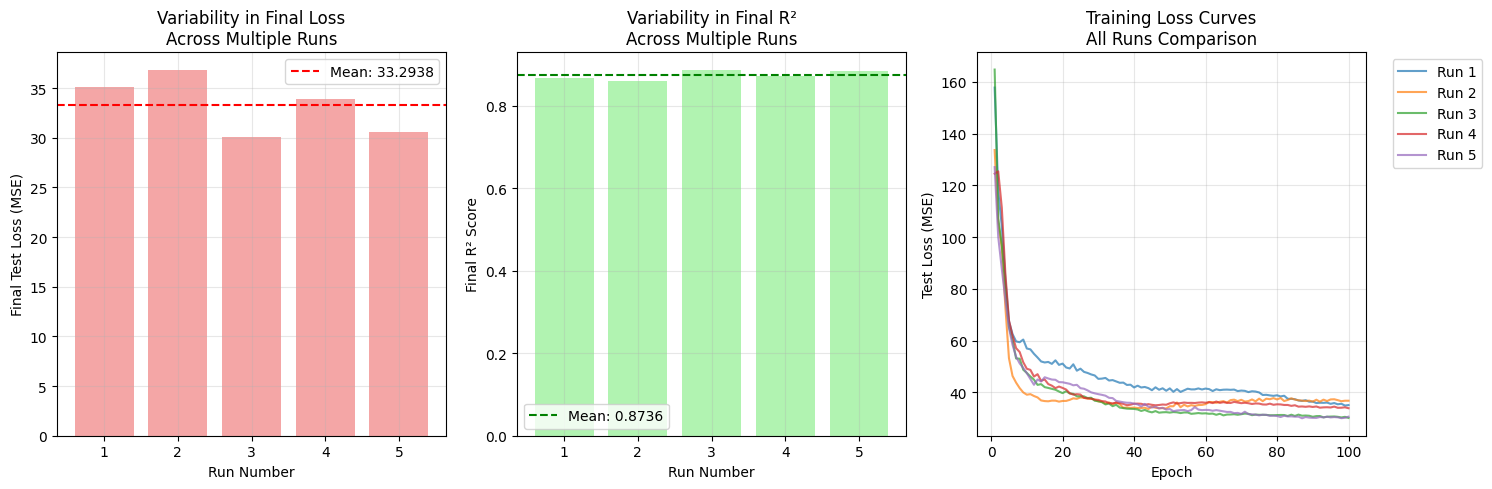

In [20]:
# Test Variability: Run multiple times and compare results
print("Testing Optimization Variability - Running 5 times...")
print("="*60)

# Store results from multiple runs
all_final_losses = []
all_final_r2_scores = []
all_train_losses = []  # To store loss curves

num_runs = 5

for run in range(num_runs):
    print(f"\nRun {run + 1}/{num_runs}:")
    
    # Create a new model with different random state each time
    mlp_variability = MLPRegressor(
        hidden_layer_sizes=(50, 50),
        activation='relu',
        solver='sgd',
        alpha=0.001,
        batch_size=32,
        learning_rate='invscaling',
        learning_rate_init=0.001,
        power_t=0.5,
        momentum=0.9,
        nesterovs_momentum=True,
        max_iter=1,
        early_stopping=False,
        validation_fraction=0.0,
        random_state=run,  # Different random state each run
        warm_start=True
    )
    
    # Train for 100 epochs
    run_train_losses = []
    for epoch in range(100):
        mlp_variability.fit(X_train, y_train)
        y_pred_run = mlp_variability.predict(X_test)
        run_loss = mean_squared_error(y_test, y_pred_run)
        run_train_losses.append(run_loss)
    
    # Final evaluation
    y_pred_final = mlp_variability.predict(X_test)
    final_loss = mean_squared_error(y_test, y_pred_final)
    final_r2 = r2_score(y_test, y_pred_final)
    
    all_final_losses.append(final_loss)
    all_final_r2_scores.append(final_r2)
    all_train_losses.append(run_train_losses)
    
    print(f"  Final Loss: {final_loss:.4f}, Final R²: {final_r2:.4f}")

# Analyze variability
print("\n" + "="*60)
print("VARIABILITY ANALYSIS RESULTS")
print("="*60)

print(f"\nFinal Loss Statistics across {num_runs} runs:")
print(f"Mean Loss: {np.mean(all_final_losses):.4f} ± {np.std(all_final_losses):.4f}")
print(f"Min Loss: {np.min(all_final_losses):.4f}")
print(f"Max Loss: {np.max(all_final_losses):.4f}")
print(f"Range: {np.max(all_final_losses) - np.min(all_final_losses):.4f}")

print(f"\nFinal R² Statistics across {num_runs} runs:")
print(f"Mean R²: {np.mean(all_final_r2_scores):.4f} ± {np.std(all_final_r2_scores):.4f}")
print(f"Min R²: {np.min(all_final_r2_scores):.4f}")
print(f"Max R²: {np.max(all_final_r2_scores):.4f}")
print(f"Range: {np.max(all_final_r2_scores) - np.min(all_final_r2_scores):.4f}")

# Plot variability visualization
plt.figure(figsize=(15, 5))

# Plot 1: Final losses across runs
plt.subplot(1, 3, 1)
plt.bar(range(1, num_runs + 1), all_final_losses, color='lightcoral', alpha=0.7)
plt.axhline(y=np.mean(all_final_losses), color='red', linestyle='--', label=f'Mean: {np.mean(all_final_losses):.4f}')
plt.xlabel('Run Number')
plt.ylabel('Final Test Loss (MSE)')
plt.title('Variability in Final Loss\nAcross Multiple Runs')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Final R² scores across runs
plt.subplot(1, 3, 2)
plt.bar(range(1, num_runs + 1), all_final_r2_scores, color='lightgreen', alpha=0.7)
plt.axhline(y=np.mean(all_final_r2_scores), color='green', linestyle='--', label=f'Mean: {np.mean(all_final_r2_scores):.4f}')
plt.xlabel('Run Number')
plt.ylabel('Final R² Score')
plt.title('Variability in Final R²\nAcross Multiple Runs')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Training loss curves for all runs
plt.subplot(1, 3, 3)
for i, losses in enumerate(all_train_losses):
    plt.plot(range(1, 101), losses, label=f'Run {i+1}', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Test Loss (MSE)')
plt.title('Training Loss Curves\nAll Runs Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Adam neural network model

COMPARING SGD vs ADAM OPTIMIZERS
Step 1: Using same data split for both optimizers...
Training set size: (824, 8)
Test set size: (206, 8)

MODEL 1: SGD WITH MOMENTUM
Training SGD model for 100 epochs...
Epoch 20/100 - Train Loss: 38.3529, Test Loss: 51.1150
Epoch 40/100 - Train Loss: 28.9861, Test Loss: 41.8912
Epoch 60/100 - Train Loss: 26.4871, Test Loss: 41.4654
Epoch 80/100 - Train Loss: 22.8739, Test Loss: 38.8724
Epoch 100/100 - Train Loss: 19.0761, Test Loss: 35.0866

SGD Final Results:
Final Test Loss: 35.0866
Final Test R²: 0.8668

MODEL 2: ADAM WITH CONSTANT LEARNING RATE
Training Adam model for 100 epochs...
Epoch 20/100 - Train Loss: 42.4167, Test Loss: 53.9757
Epoch 40/100 - Train Loss: 35.3017, Test Loss: 53.7280
Epoch 60/100 - Train Loss: 28.1938, Test Loss: 46.0629
Epoch 80/100 - Train Loss: 23.7594, Test Loss: 40.6232
Epoch 100/100 - Train Loss: 21.5617, Test Loss: 39.2856

Adam Final Results:
Final Test Loss: 39.2856
Final Test R²: 0.8508

COMPREHENSIVE OPTIMIZER COMP

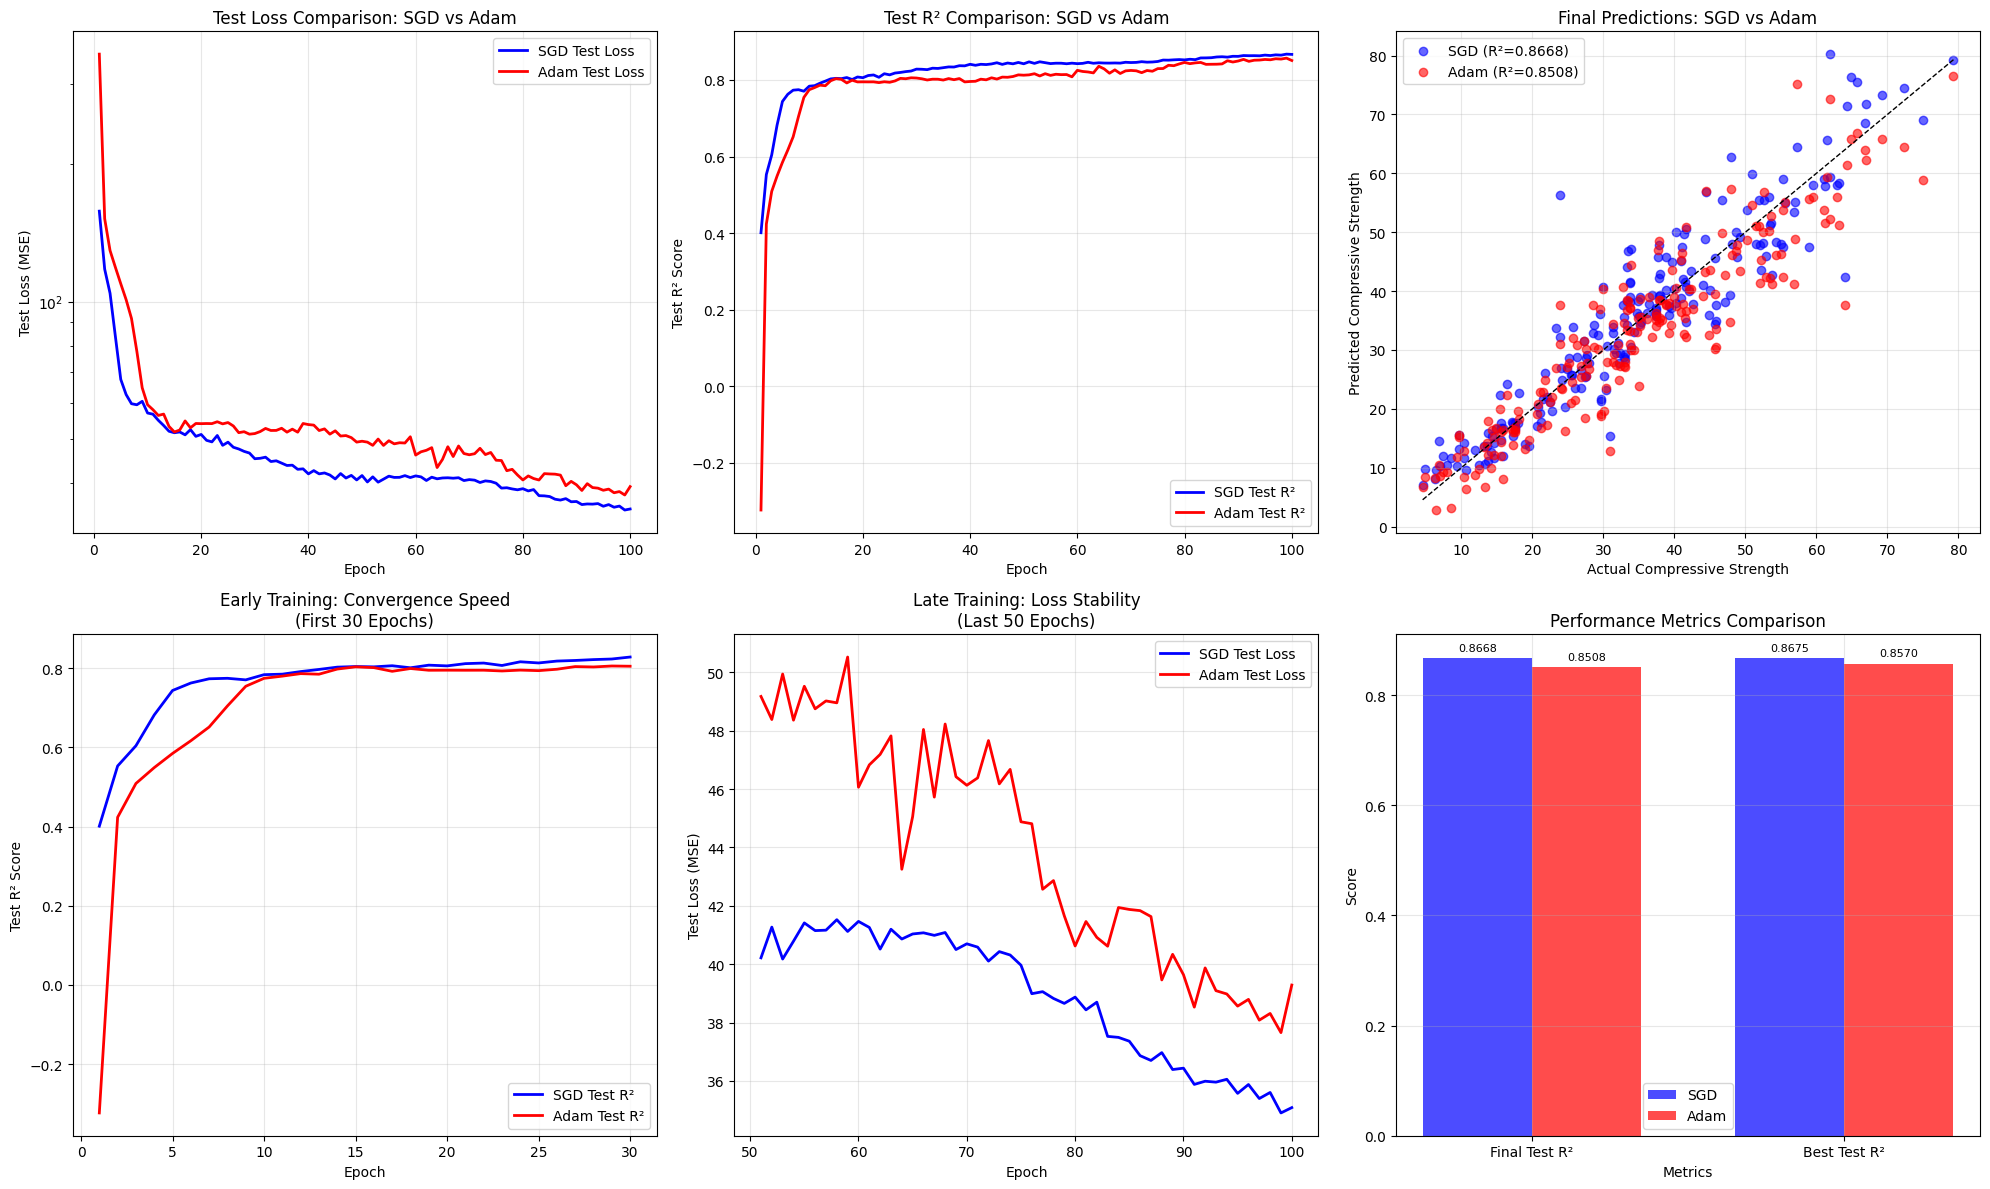


EXAMPLE PREDICTIONS COMPARISON
Actual  -> SGD Predicted -> Adam Predicted
-------------------------------------------------------
  26.1 ->          23.6 ->           21.5
  10.4 ->          11.7 ->            8.4
  79.3 ->          79.3 ->           76.5
  75.0 ->          69.1 ->           58.8
   9.7 ->          13.2 ->           15.5
  47.1 ->          38.2 ->           42.7
  59.0 ->          47.5 ->           55.7
  22.7 ->          19.6 ->           22.0
  61.9 ->          80.2 ->           72.7
  52.1 ->          47.9 ->           41.3

FINAL RECOMMENDATION
✅ RECOMMENDATION: Use SGD with Momentum
   Reason: Higher final R² (0.8668 vs 0.8508)

Additional Insights:
- SGD convergence speed: 30 epochs
- Adam convergence speed: 52 epochs
- SGD training stability: 0.986790
- Adam training stability: 1.456556
- SGD converged faster to near-optimal performance


In [21]:
# Compare SGD vs Adam Optimizers
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("COMPARING SGD vs ADAM OPTIMIZERS")
print("="*60)

# Use the same data split for fair comparison
print("Step 1: Using same data split for both optimizers...")
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=0
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Model 1: SGD with Momentum (Your current implementation)
print("\n" + "="*50)
print("MODEL 1: SGD WITH MOMENTUM")
print("="*50)

sgd_model = MLPRegressor(
    hidden_layer_sizes=(50, 50),
    activation='relu',
    solver='sgd',
    alpha=0.001,
    batch_size=32,
    learning_rate='invscaling',
    learning_rate_init=0.001,
    power_t=0.5,
    momentum=0.9,
    nesterovs_momentum=True,
    max_iter=1,
    early_stopping=False,
    validation_fraction=0.0,
    random_state=0,
    warm_start=True
)

print("Training SGD model for 100 epochs...")
sgd_train_losses = []
sgd_test_losses = []
sgd_train_r2 = []
sgd_test_r2 = []

for epoch in range(100):
    sgd_model.fit(X_train, y_train)
    
    # Training predictions and metrics
    y_train_pred_sgd = sgd_model.predict(X_train)
    train_loss_sgd = mean_squared_error(y_train, y_train_pred_sgd)
    train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
    
    # Testing predictions and metrics
    y_test_pred_sgd = sgd_model.predict(X_test)
    test_loss_sgd = mean_squared_error(y_test, y_test_pred_sgd)
    test_r2_sgd = r2_score(y_test, y_test_pred_sgd)
    
    sgd_train_losses.append(train_loss_sgd)
    sgd_test_losses.append(test_loss_sgd)
    sgd_train_r2.append(train_r2_sgd)
    sgd_test_r2.append(test_r2_sgd)
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch + 1}/100 - Train Loss: {train_loss_sgd:.4f}, Test Loss: {test_loss_sgd:.4f}")

# Final SGD evaluation
y_pred_sgd = sgd_model.predict(X_test)
sgd_final_loss = mean_squared_error(y_test, y_pred_sgd)
sgd_final_r2 = r2_score(y_test, y_pred_sgd)

print(f"\nSGD Final Results:")
print(f"Final Test Loss: {sgd_final_loss:.4f}")
print(f"Final Test R²: {sgd_final_r2:.4f}")

# Model 2: Adam with Constant Learning Rate
print("\n" + "="*50)
print("MODEL 2: ADAM WITH CONSTANT LEARNING RATE")
print("="*50)

adam_model = MLPRegressor(
    hidden_layer_sizes=(50, 50),  # Same architecture
    activation='relu',
    solver='adam',                # Adam optimizer
    alpha=0.001,                  # Same L2 regularization
    batch_size=32,                # Same batch size
    learning_rate='constant',     # Constant learning rate
    learning_rate_init=0.01,      # Learning rate = 0.01 as specified
    max_iter=1,                   # 1 epoch at a time
    early_stopping=False,
    validation_fraction=0.0,
    random_state=0,               # Same random state
    warm_start=True
)

print("Training Adam model for 100 epochs...")
adam_train_losses = []
adam_test_losses = []
adam_train_r2 = []
adam_test_r2 = []

for epoch in range(100):
    adam_model.fit(X_train, y_train)
    
    # Training predictions and metrics
    y_train_pred_adam = adam_model.predict(X_train)
    train_loss_adam = mean_squared_error(y_train, y_train_pred_adam)
    train_r2_adam = r2_score(y_train, y_train_pred_adam)
    
    # Testing predictions and metrics
    y_test_pred_adam = adam_model.predict(X_test)
    test_loss_adam = mean_squared_error(y_test, y_test_pred_adam)
    test_r2_adam = r2_score(y_test, y_test_pred_adam)
    
    adam_train_losses.append(train_loss_adam)
    adam_test_losses.append(test_loss_adam)
    adam_train_r2.append(train_r2_adam)
    adam_test_r2.append(test_r2_adam)
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch + 1}/100 - Train Loss: {train_loss_adam:.4f}, Test Loss: {test_loss_adam:.4f}")

# Final Adam evaluation
y_pred_adam = adam_model.predict(X_test)
adam_final_loss = mean_squared_error(y_test, y_pred_adam)
adam_final_r2 = r2_score(y_test, y_pred_adam)

print(f"\nAdam Final Results:")
print(f"Final Test Loss: {adam_final_loss:.4f}")
print(f"Final Test R²: {adam_final_r2:.4f}")

# Comprehensive Comparison
print("\n" + "="*60)
print("COMPREHENSIVE OPTIMIZER COMPARISON")
print("="*60)

# Create comparison table
comparison_data = {
    'Optimizer': ['SGD with Momentum', 'Adam'],
    'Final Test Loss': [sgd_final_loss, adam_final_loss],
    'Final Test R²': [sgd_final_r2, adam_final_r2],
    'Best Test R²': [max(sgd_test_r2), max(adam_test_r2)],
    'Convergence Epoch (to 95% of best R²)': [
        next(i for i, r2 in enumerate(sgd_test_r2) if r2 >= 0.95 * max(sgd_test_r2)) + 1,
        next(i for i, r2 in enumerate(adam_test_r2) if r2 >= 0.95 * max(adam_test_r2)) + 1
    ],
    'Training Stability (Loss Std)': [np.std(sgd_train_losses[-20:]), np.std(adam_train_losses[-20:])]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Detailed Visualizations
print("\nStep 5: Creating comprehensive comparison visualizations...")
plt.figure(figsize=(20, 12))

# Plot 1: Loss comparison over epochs
plt.subplot(2, 3, 1)
plt.plot(range(1, 101), sgd_test_losses, label='SGD Test Loss', color='blue', linewidth=2)
plt.plot(range(1, 101), adam_test_losses, label='Adam Test Loss', color='red', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Test Loss (MSE)')
plt.title('Test Loss Comparison: SGD vs Adam')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to better see differences

# Plot 2: R² comparison over epochs
plt.subplot(2, 3, 2)
plt.plot(range(1, 101), sgd_test_r2, label='SGD Test R²', color='blue', linewidth=2)
plt.plot(range(1, 101), adam_test_r2, label='Adam Test R²', color='red', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Test R² Score')
plt.title('Test R² Comparison: SGD vs Adam')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Final predictions comparison
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_sgd, alpha=0.6, color='blue', label=f'SGD (R²={sgd_final_r2:.4f})')
plt.scatter(y_test, y_pred_adam, alpha=0.6, color='red', label=f'Adam (R²={adam_final_r2:.4f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual Compressive Strength')
plt.ylabel('Predicted Compressive Strength')
plt.title('Final Predictions: SGD vs Adam')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Convergence speed (first 30 epochs)
plt.subplot(2, 3, 4)
plt.plot(range(1, 31), sgd_test_r2[:30], label='SGD Test R²', color='blue', linewidth=2)
plt.plot(range(1, 31), adam_test_r2[:30], label='Adam Test R²', color='red', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Test R² Score')
plt.title('Early Training: Convergence Speed\n(First 30 Epochs)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Loss stability (last 50 epochs)
plt.subplot(2, 3, 5)
plt.plot(range(51, 101), sgd_test_losses[50:], label='SGD Test Loss', color='blue', linewidth=2)
plt.plot(range(51, 101), adam_test_losses[50:], label='Adam Test Loss', color='red', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Test Loss (MSE)')
plt.title('Late Training: Loss Stability\n(Last 50 Epochs)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Performance comparison bar chart
plt.subplot(2, 3, 6)
metrics = [ 'Final Test R²', 'Best Test R²']
sgd_values = [ sgd_final_r2, max(sgd_test_r2)]
adam_values = [ adam_final_r2, max(adam_test_r2)]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, sgd_values, width, label='SGD', color='blue', alpha=0.7)
plt.bar(x + width/2, adam_values, width, label='Adam', color='red', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (sgd_val, adam_val) in enumerate(zip(sgd_values, adam_values)):
    plt.text(i - width/2, sgd_val + 0.01, f'{sgd_val:.4f}', ha='center', va='bottom', fontsize=8)
    plt.text(i + width/2, adam_val + 0.01, f'{adam_val:.4f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Print example predictions from both models
print("\n" + "="*60)
print("EXAMPLE PREDICTIONS COMPARISON")
print("="*60)

print("Actual  -> SGD Predicted -> Adam Predicted")
print("-" * 55)
for i in range(10):
    actual = y_test.values[i]
    sgd_pred = y_pred_sgd[i]
    adam_pred = y_pred_adam[i]
    print(f"{actual:6.1f} -> {sgd_pred:13.1f} -> {adam_pred:14.1f}")

# Final recommendation
print("\n" + "="*60)
print("FINAL RECOMMENDATION")
print("="*60)

if sgd_final_r2 > adam_final_r2:
    print("✅ RECOMMENDATION: Use SGD with Momentum")
    print(f"   Reason: Higher final R² ({sgd_final_r2:.4f} vs {adam_final_r2:.4f})")
elif adam_final_r2 > sgd_final_r2:
    print("✅ RECOMMENDATION: Use Adam Optimizer") 
    print(f"   Reason: Higher final R² ({adam_final_r2:.4f} vs {sgd_final_r2:.4f})")
else:
    print("✅ RECOMMENDATION: Both perform similarly")
    print("   Consider SGD for stability or Adam for faster convergence")

# Additional analysis
print(f"\nAdditional Insights:")
print(f"- SGD convergence speed: {comparison_data['Convergence Epoch (to 95% of best R²)'][0]} epochs")
print(f"- Adam convergence speed: {comparison_data['Convergence Epoch (to 95% of best R²)'][1]} epochs")
print(f"- SGD training stability: {comparison_data['Training Stability (Loss Std)'][0]:.6f}")
print(f"- Adam training stability: {comparison_data['Training Stability (Loss Std)'][1]:.6f}")

if comparison_data['Convergence Epoch (to 95% of best R²)'][1] < comparison_data['Convergence Epoch (to 95% of best R²)'][0]:
    print("- Adam converged faster to near-optimal performance")
else:
    print("- SGD converged faster to near-optimal performance")

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. Chatgpt, google AI, and Deepseek.
2. Chronologically.
3. I used prompts like "help me draft up pyplots for data analysis", and "draft up this machine learning model". I had to modify and personalize parameters to meet criteria, and debugging requires understanding of the material. Using AI to draft up code helps with accelerating learning so time is spent on learning and deep diving on using tools instead of spending time on syntax errors and conceptual misunderstanding that commonly happen when we first learn new things. With AI, you can ask for clear step by step guidance that facilitates understanding new material.
4. I originally concluded with a neural network that under-fitted and was not scaled properly, leading to convergence towards the median and the model not learning properly within its hidden layers. Scaling the data during preprocessing was vital to training a successful neural network.

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

## Part 2: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I enjoyed the process of putting this machine learning models into action, tuning and toying with the model to pick up intricate details of using these tools, sparking inspiration on personal project use cases beyond course material.